<a href="https://colab.research.google.com/github/Dhanushtg/Bank-Loan-Analysis-SQL/blob/main/Iris%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.datasets as datasets

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.tree import plot_tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
d= pd.read_csv("/content/Iris.csv")

In [ ]:
q1 = d['SepalWidthCm'].quantile(0.25)
q3 = d['SepalWidthCm'].quantile(0.75)
iqr = q3 - q1
d = d[(d['SepalWidthCm'] >= q1-1.5*iqr) & (d['SepalWidthCm'] <= q3+1.5*iqr)]
d.shape

(146, 6)

In [ ]:
X = d.drop("Species",axis=1)
y = d["Species"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state= 1)

In [ ]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=1 )
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=1)

In [ ]:
dt.score(x_test,y_test)

1.0

In [ ]:
Y_pred=dt.predict(x_test)
accuracy_score(y_test,Y_pred)

1.0

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
con_mat=confusion_matrix(y_test,Y_pred)

In [ ]:

con_mat

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 14]])

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(max_depth=3,min_samples_leaf=10,random_state=2)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)

In [ ]:
accuracy_score(y_test,pred)

1.0

Feature importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Feature importances:
1. petal length (cm): 0.43999397414456937
2. petal width (cm): 0.4215215887397244
3. sepal length (cm): 0.10809762464246378
4. sepal width (cm): 0.030386812473242528


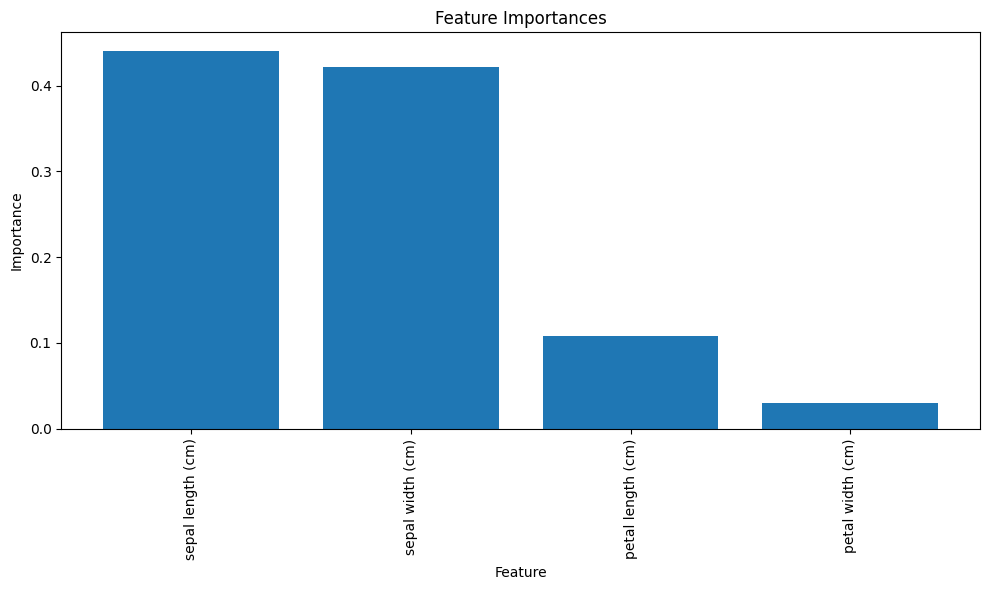

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
feature_importances = clf.feature_importances_
indices = np.argsort(feature_importances)[::-1]
print("Feature importances:")
for i, idx in enumerate(indices):
    if idx < len(X_train.columns):
        column_name = X_train.columns[idx]
        print(f"{i+1}. {column_name}: {feature_importances[idx]}")
    else:
        print(f"Index {idx} is out of bounds for axis 0 with size {len(X_train.columns)}")
X_new = X_train.iloc[:, indices]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_new.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_new.shape[1]), np.array(X_new.columns)[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data
y=iris.target
df=pd.DataFrame(X,columns=iris.feature_names)
df['target']=y
cor=df.corr()['target'][:-1]
print("Correlation between features and targets:",cor)


Correlation between features and targets: sepal length (cm)    0.782561
sepal width (cm)    -0.426658
petal length (cm)    0.949035
petal width (cm)     0.956547
Name: target, dtype: float64


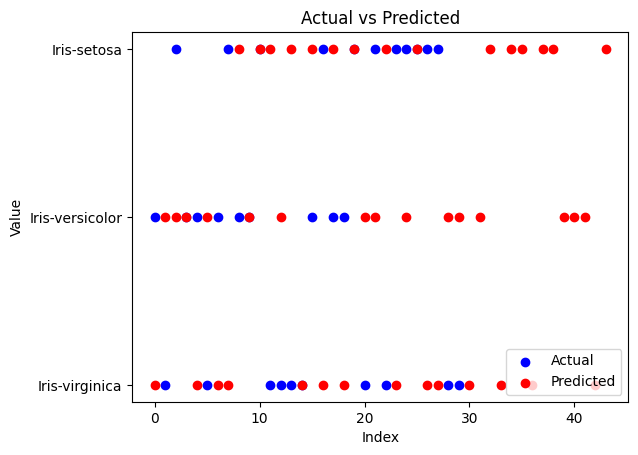

In [ ]:
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(pred)), pred, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

PEtal length

In [ ]:
x1=d.iloc[:,3:-1]
y1=d["Species"]

In [ ]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X,y,test_size=0.3, random_state= 1)

In [ ]:
rf1=RandomForestClassifier(max_depth=3,min_samples_leaf=10,random_state=2)
rf1.fit(x1_train,y1_train)
pred1=rf1.predict(x1_test)

In [ ]:
accuracy_score(y1_test,pred1)

0.9555555555555556

Sepallength

In [ ]:
x2=d.iloc[:,1:-3]
y2=d["Species"]

In [ ]:
x2_train,x2_test,y2_train,y2_test=train_test_split(X,y,test_size=0.3, random_state= 1)
rf2=RandomForestClassifier(max_depth=3,min_samples_leaf=10,random_state=2)
rf2.fit(x2_train,y2_train)
pred2=rf2.predict(x2_test)

In [ ]:
accuracy_score(y2_test,pred2)

0.9555555555555556